In [3]:
import pandas as pd

In [4]:
cancer=pd.read_csv('/content/breast_cancer_survival.csv')

In [6]:
print(cancer)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [8]:
print(cancer.dtypes)
print("shape",cancer.shape)

Age                     int64
Gender                 object
Protein1              float64
Protein2              float64
Protein3              float64
Protein4              float64
Tumour_Stage           object
Histology              object
ER status              object
PR status              object
HER2 status            object
Surgery_type           object
Date_of_Surgery        object
Date_of_Last_Visit     object
Patient_Status         object
dtype: object
shape (334, 15)


In [9]:
h=cancer.drop({'Histology','ER status','PR status','Date_of_Surgery','Date_of_Last_Visit','Surgery_type','HER2 status'},axis=1)

In [10]:
print(h.isnull().sum())

Age                0
Gender             0
Protein1           0
Protein2           0
Protein3           0
Protein4           0
Tumour_Stage       0
Patient_Status    13
dtype: int64


In [11]:
cancer['Patient_Status'].isnull().sum()/h.shape[0]

0.038922155688622756

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [13]:
encoder = LabelEncoder()
h['Gender'] = encoder.fit_transform(h['Gender'])


In [14]:
# Define mapping for 'Gender' column
gender_mapping = {'Female': 1, 'Male': 0}

# Map 'Gender' column using the defined mapping, and fill any NaN values with 0
h['Gender'] = h['Gender'].map(gender_mapping).fillna(0).astype(int)

# Define mapping for 'Tumour_Stage' column
tumour_stage_mapping = {'Stage I': 1, 'Stage II': 2, 'Stage III': 3}

# Map 'Tumour_Stage' column using the defined mapping, and fill any NaN values with 0
h['Tumour_Stage'] = h['Tumour_Stage'].map(tumour_stage_mapping).fillna(0).astype(int)
Patient_Status_mapping = {'Alive': 1, 'Dead': 0}


h['Patient_Status'] = h['Patient_Status'].map(Patient_Status_mapping).fillna(0).astype(int)

# Now, 'Gender' column will have 1 for 'Female' and 0 for 'Male', and 'Tumour_Stage' column will have corresponding integers for each stage.


h.describe()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Patient_Status
count,334.000000,334.0,334.000000,334.000000,334.000000,334.000000,334.0,334.000000
mean,58.886228,0.0,-0.029991,0.946896,-0.090204,0.009819,0.0,0.763473
std,12.961212,0.0,0.563588,0.911637,0.585175,0.629055,0.0,0.425587
min,29.000000,0.0,-2.340900,-0.978730,-1.627400,-2.025500,0.0,0.000000
25%,49.000000,0.0,-0.358888,0.362173,-0.513748,-0.377090,0.0,1.000000
50%,58.000000,0.0,0.006129,0.992805,-0.173180,0.041768,0.0,1.000000
75%,68.000000,0.0,0.343598,1.627900,0.278353,0.425630,0.0,1.000000
max,90.000000,0.0,1.593600,3.402200,2.193400,1.629900,0.0,1.000000


In [15]:
y=h['Patient_Status']
x=h.drop('Patient_Status',axis=1)

In [16]:
x=x.fillna(0)

In [17]:
print(x)
print(y)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage
0     42       0  0.952560   2.15000  0.007972 -0.048340             0
1     54       0  0.000000   1.38020 -0.498030 -0.507320             0
2     63       0 -0.523030   1.76400 -0.370190  0.010815             0
3     78       0 -0.876180   0.12943 -0.370380  0.132190             0
4     42       0  0.226110   1.74910 -0.543970 -0.390210             0
..   ...     ...       ...       ...       ...       ...           ...
329   59       0  0.024598   1.40050  0.024751  0.280320             0
330   41       0  0.100120  -0.46547  0.472370 -0.523870             0
331   54       0  0.753820   1.64250 -0.332850  0.857860             0
332   74       0  0.972510   1.42680 -0.366570 -0.107820             0
333   66       0  0.286380   1.39980  0.318830  0.836050             0

[334 rows x 7 columns]
0      1
1      0
2      1
3      1
4      1
      ..
329    1
330    1
331    0
332    1
333    0
Name: Patient_Status, Len

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [20]:
print(x_train.isnull())

print(x_train)

       Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage
224  False   False     False     False     False     False         False
78   False   False     False     False     False     False         False
295  False   False     False     False     False     False         False
17   False   False     False     False     False     False         False
24   False   False     False     False     False     False         False
..     ...     ...       ...       ...       ...       ...           ...
188  False   False     False     False     False     False         False
71   False   False     False     False     False     False         False
106  False   False     False     False     False     False         False
270  False   False     False     False     False     False         False
102  False   False     False     False     False     False         False

[267 rows x 7 columns]
     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage
224   38       0 -0.268450   

In [21]:
print(x_test)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage
25    76       0  0.043546  -0.40171  0.466850   1.04780             0
309   52       0 -0.179320   1.52870 -0.163130   0.83222             0
73    66       0 -1.344100   1.12800 -0.229350  -0.22993             0
195   76       0 -0.245140   0.61407  0.126510   0.39114             0
57    55       0 -0.663420   1.93820 -0.775370  -0.26366             0
..   ...     ...       ...       ...       ...       ...           ...
280   57       0 -0.213780  -0.62814  1.022600   0.20244             0
3     78       0 -0.876180   0.12943 -0.370380   0.13219             0
77    59       0  0.276410  -0.87612  1.298000  -0.68664             0
311   42       0  0.172950   1.29660 -0.856770  -0.23695             0
60    56       0 -0.675420   0.26937 -0.086603   1.07140             0

[67 rows x 7 columns]


In [22]:
print(y_train)

224    1
78     1
295    0
17     0
24     1
      ..
188    0
71     1
106    1
270    1
102    1
Name: Patient_Status, Length: 267, dtype: int64


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error



knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:",mae)

Mean Absolute Error: 0.382089552238806


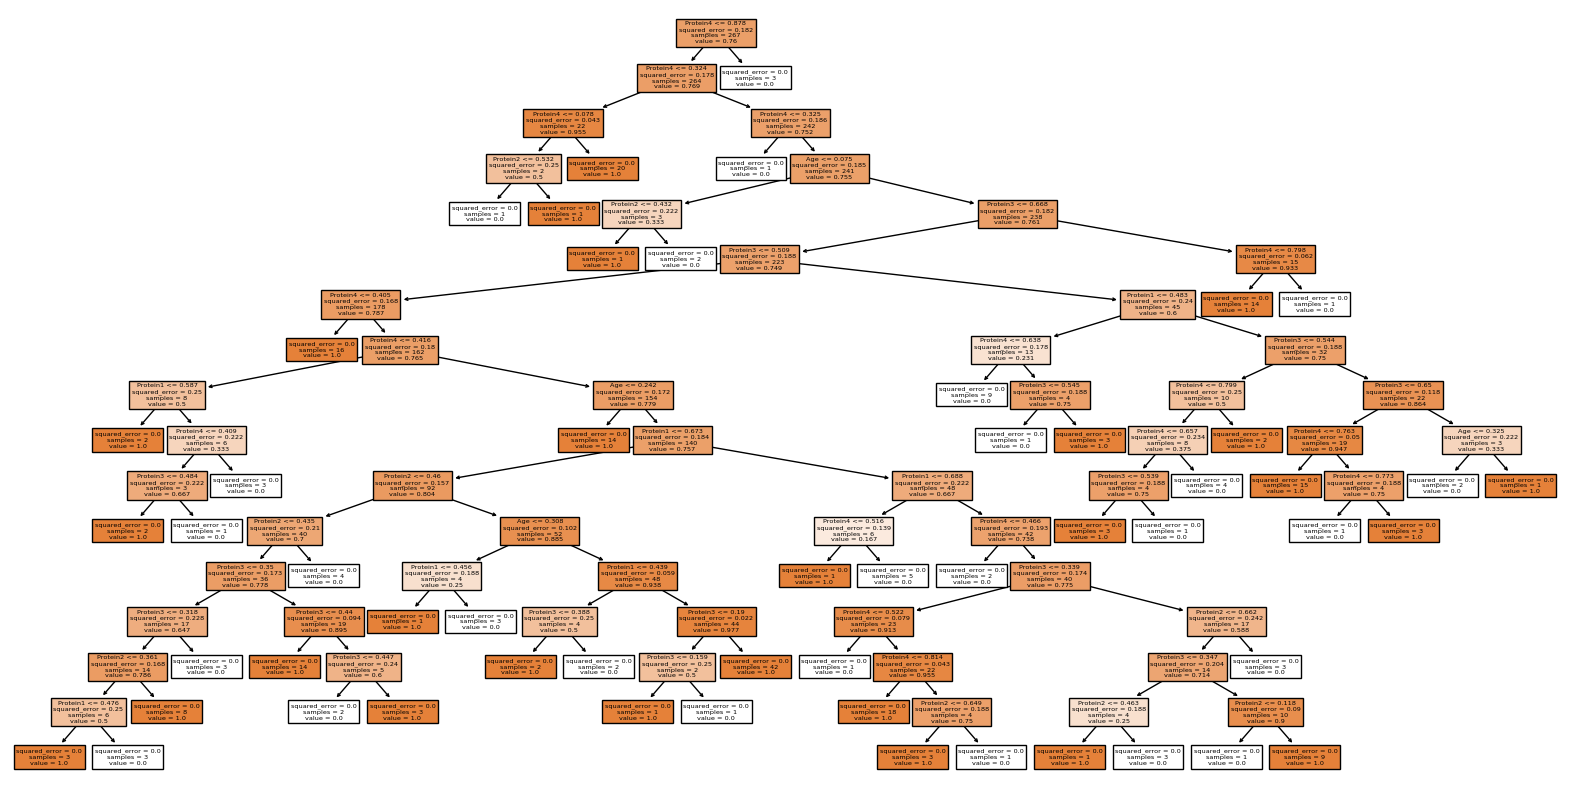

In [25]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_scaled, y_train)
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=x.columns)
plt.show()